# Stream Processing Project

## Preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn import metrics
from river import stream
from river import linear_model
from river import optim
from river import preprocessing
from river import tree
from river import metrics
from river import compose
from river import ensemble
from river import evaluate
from river import neighbors
from river import forest
from river import imblearn
from river import multiclass
from river import feature_selection
from river import stats
from river import model_selection
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('Wednesday-workingHours.pcap_ISCX.csv', engine='python')
data.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,692703.000000,692703.000000,692703.000000,6.927030e+05,692703.000000,692703.000000,6.927030e+05,6.927030e+05,692703.000000,692703.000000,...,692703.000000,692703.000000,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05
mean,42583.995907,5686.869462,9.219523,2.800168e+07,9.556261,10.214079,5.550930e+02,1.699644e+04,233.593936,15.022183,...,6.121279,26.761141,9.224478e+04,4.760852e+04,1.627363e+05,6.315186e+04,2.211122e+07,4.743744e+05,2.252174e+07,2.173373e+07
std,19535.697710,15727.423560,5.009796,4.276680e+07,747.197814,984.204633,6.163663e+03,2.241175e+06,603.751856,51.068835,...,715.155068,6.322368,7.007049e+05,4.742081e+05,1.094616e+06,6.051023e+05,3.812415e+07,4.488512e+06,3.848292e+07,3.807725e+07
min,0.000000,0.000000,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,36235.000000,53.000000,6.000000,2.010000e+02,2.000000,1.000000,1.200000e+01,0.000000e+00,6.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,49822.000000,80.000000,6.000000,6.143700e+04,2.000000,2.000000,8.200000e+01,1.880000e+02,46.000000,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,56892.000000,443.000000,17.000000,8.302437e+07,7.000000,6.000000,3.650000e+02,1.159500e+04,341.000000,32.000000,...,2.000000,32.000000,9.910000e+02,0.000000e+00,9.910000e+02,9.880000e+02,1.590000e+07,0.000000e+00,1.650000e+07,1.000000e+07
max,65535.000000,65487.000000,17.000000,1.200000e+08,203943.000000,272353.000000,1.224076e+06,6.270000e+08,24820.000000,2065.000000,...,197124.000000,60.000000,1.000000e+08,7.420000e+07,1.050000e+08,1.000000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [4]:
data.shape, len(data)

((692703, 85), 692703)

In [5]:
data[' Label'].value_counts()

 Label
BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: count, dtype: int64

In [6]:
data = data.drop(data[pd.isnull(data['Flow ID'])].index)
data.shape

(692703, 85)

Replace the NaN values and infinity values with -1.

In [7]:
data.replace('Infinity', -1, inplace=True)
data[["Flow Bytes/s", " Flow Packets/s"]] = data[["Flow Bytes/s", " Flow Packets/s"]].apply(pd.to_numeric)

In [8]:
data.replace([np.inf, -np.inf, np.nan], -1, inplace=True)

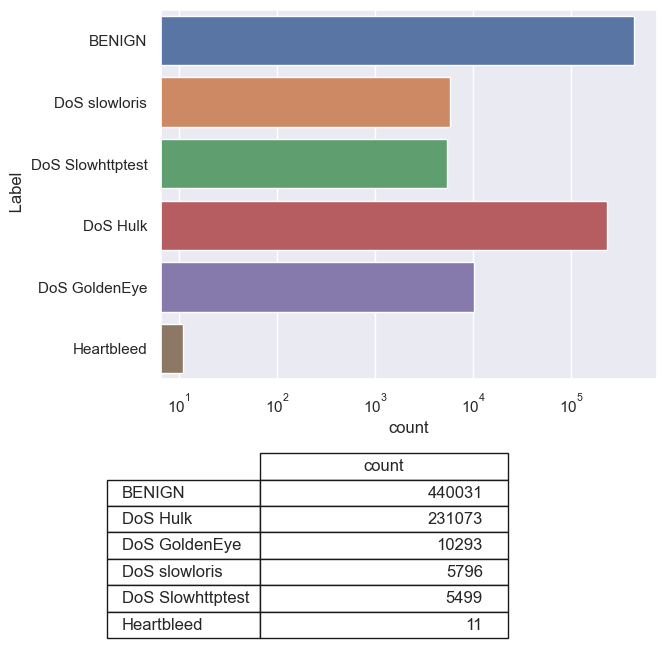

In [9]:
import seaborn as sns
sns.set()
sns.countplot(y=data[' Label'])
p = data[" Label"].value_counts().to_frame()
pp = p.rename(columns={" Label": "Count"})
table = plt.table(cellText=pp.values,
                  rowLabels=pp.index,
                  colLabels=pp.columns,
                  bbox=(.2, -.7, 0.5, 0.5))
plt.xscale('log')
#display final plot
plt.show()

In [10]:
vett = []
for i in data.keys():
    x = len(data[i].value_counts())
    if x == 1:
        print("constant: {}".format(i))
        vett.append(i)
    elif x < 10:
        #print("pochi: {}, sono solo {}".format(i, x))
        pass
    elif x == len(data):
        print("Troppi: {}, sono{}".format(i, x))
vett

constant:  Bwd PSH Flags
constant:  Fwd URG Flags
constant:  Bwd URG Flags
constant:  CWE Flag Count
constant: Fwd Avg Bytes/Bulk
constant:  Fwd Avg Packets/Bulk
constant:  Fwd Avg Bulk Rate
constant:  Bwd Avg Bytes/Bulk
constant:  Bwd Avg Packets/Bulk
constant: Bwd Avg Bulk Rate


[' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 ' CWE Flag Count',
 'Fwd Avg Bytes/Bulk',
 ' Fwd Avg Packets/Bulk',
 ' Fwd Avg Bulk Rate',
 ' Bwd Avg Bytes/Bulk',
 ' Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

## part 2

In [11]:
for i in data.keys():
    if i[0] == " ":
        data.rename(columns={i: i[1:]}, inplace=True)
data.keys()

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

### select useful features

In [12]:
excluded = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp','Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags','CWE Flag Count','Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
data = data.drop(columns=excluded, errors='ignore')

In [13]:
len(data.keys())

68

### [NOT USED]undersampling against unbalance

In [ ]:
benign_total = len(data[data['Label'] == "BENIGN"])
benign_total

In [ ]:
attack_total = len(data[data['Label'] != "BENIGN"])
attack_total

In [ ]:
data.to_csv("attacks_unbalanced.csv", index=False)
data['Label'].value_counts()

In [ ]:
enlargement = 1.1
benign_included_max = attack_total
benign_inc_probability = (benign_included_max / benign_total) * enlargement
print(benign_included_max, benign_inc_probability)

In [ ]:
import random
indexes = []
benign_included_count = 0
for index, row in data.iterrows():
    if (row['Label'] != "BENIGN"):
        indexes.append(index)
    else:
        
        if random.random() > benign_inc_probability: continue
        
        if benign_included_count > benign_included_max: continue
        benign_included_count += 1
        indexes.append(index)
df_balanced = data.loc[indexes]

In [ ]:
df_balanced['Label'].value_counts()

In [ ]:
df_balanced.to_csv("attacks_balanced.csv", index=False)

## Best features

In [14]:
df_balanced = pd.read_csv('attacks_balanced.csv', engine='python')
df_balanced.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,5.053450e+05,505345.000000,505345.000000,5.053450e+05,5.053450e+05,505345.000000,505345.000000,505345.000000,505345.000000,505345.000000,...,505345.000000,505345.000000,5.053450e+05,5.053450e+05,5.053450e+05,5.053450e+05,5.053450e+05,5.053450e+05,5.053450e+05,5.053450e+05
mean,3.441387e+07,9.884487,10.486335,5.328758e+02,1.844776e+04,242.801941,12.136147,59.645901,89.014338,2139.966561,...,6.197679,26.996155,1.008511e+05,4.842374e+04,1.665782e+05,7.039843e+04,2.891572e+07,5.988385e+05,2.943926e+07,2.845199e+07
std,4.505227e+07,798.780121,1056.557145,6.236093e+03,2.418591e+06,565.914871,53.800484,149.402489,212.156130,2880.532293,...,764.482056,6.249976,7.383061e+05,4.845594e+05,1.100599e+06,6.452748e+05,4.179807e+07,5.128700e+06,4.214358e+07,4.180890e+07
min,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.300000e+02,2.000000,1.000000,1.200000e+01,0.000000e+00,6.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.505360e+05,3.000000,2.000000,1.000000e+02,2.340000e+02,53.000000,0.000000,42.111111,3.535534,137.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.543511e+07,7.000000,6.000000,3.710000e+02,1.159500e+04,351.000000,6.000000,59.600000,136.433134,4344.000000,...,2.000000,32.000000,1.016000e+03,0.000000e+00,1.016000e+03,1.010000e+03,8.410000e+07,0.000000e+00,8.440000e+07,8.410000e+07
max,1.200000e+08,203943.000000,272353.000000,1.224076e+06,6.270000e+08,24820.000000,2065.000000,4640.757576,6429.190773,17376.000000,...,197124.000000,60.000000,1.000000e+08,7.000000e+07,1.000000e+08,1.000000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [15]:
df_unbalanced = pd.read_csv('attacks_unbalanced.csv', engine='python')
df_unbalanced.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,6.927030e+05,692703.000000,692703.000000,6.927030e+05,6.927030e+05,692703.000000,692703.000000,692703.000000,692703.000000,692703.000000,...,692703.000000,692703.000000,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05
mean,2.800168e+07,9.556261,10.214079,5.550930e+02,1.699644e+04,233.593936,15.022183,60.555440,82.895863,1661.546313,...,6.121279,26.761141,9.224478e+04,4.760852e+04,1.627363e+05,6.315186e+04,2.211122e+07,4.743744e+05,2.252174e+07,2.173373e+07
std,4.276680e+07,747.197814,984.204633,6.163663e+03,2.241175e+06,603.751856,51.068835,157.643794,226.126084,2613.924428,...,715.155068,6.322368,7.007049e+05,4.742081e+05,1.094616e+06,6.051023e+05,3.812415e+07,4.488512e+06,3.848292e+07,3.807725e+07
min,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000,1.000000,1.200000e+01,0.000000e+00,6.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.143700e+04,2.000000,2.000000,8.200000e+01,1.880000e+02,46.000000,0.000000,41.000000,0.000000,113.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.302437e+07,7.000000,6.000000,3.650000e+02,1.159500e+04,341.000000,32.000000,56.666667,128.916917,2896.000000,...,2.000000,32.000000,9.910000e+02,0.000000e+00,9.910000e+02,9.880000e+02,1.590000e+07,0.000000e+00,1.650000e+07,1.000000e+07
max,1.200000e+08,203943.000000,272353.000000,1.224076e+06,6.270000e+08,24820.000000,2065.000000,4640.757576,6429.190773,19530.000000,...,197124.000000,60.000000,1.000000e+08,7.420000e+07,1.050000e+08,1.000000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


### Feature selection

In [16]:
df_used = df_unbalanced

In [17]:
from sklearn.preprocessing import LabelEncoder

df_used['Label'] = LabelEncoder().fit_transform(df_used['Label'])

In [18]:
df_used['Label'].value_counts(normalize=True)

Label
0    0.635238
2    0.333582
1    0.014859
4    0.008367
3    0.007938
5    0.000016
Name: proportion, dtype: float64

In [19]:
df_used.shape

(692703, 68)

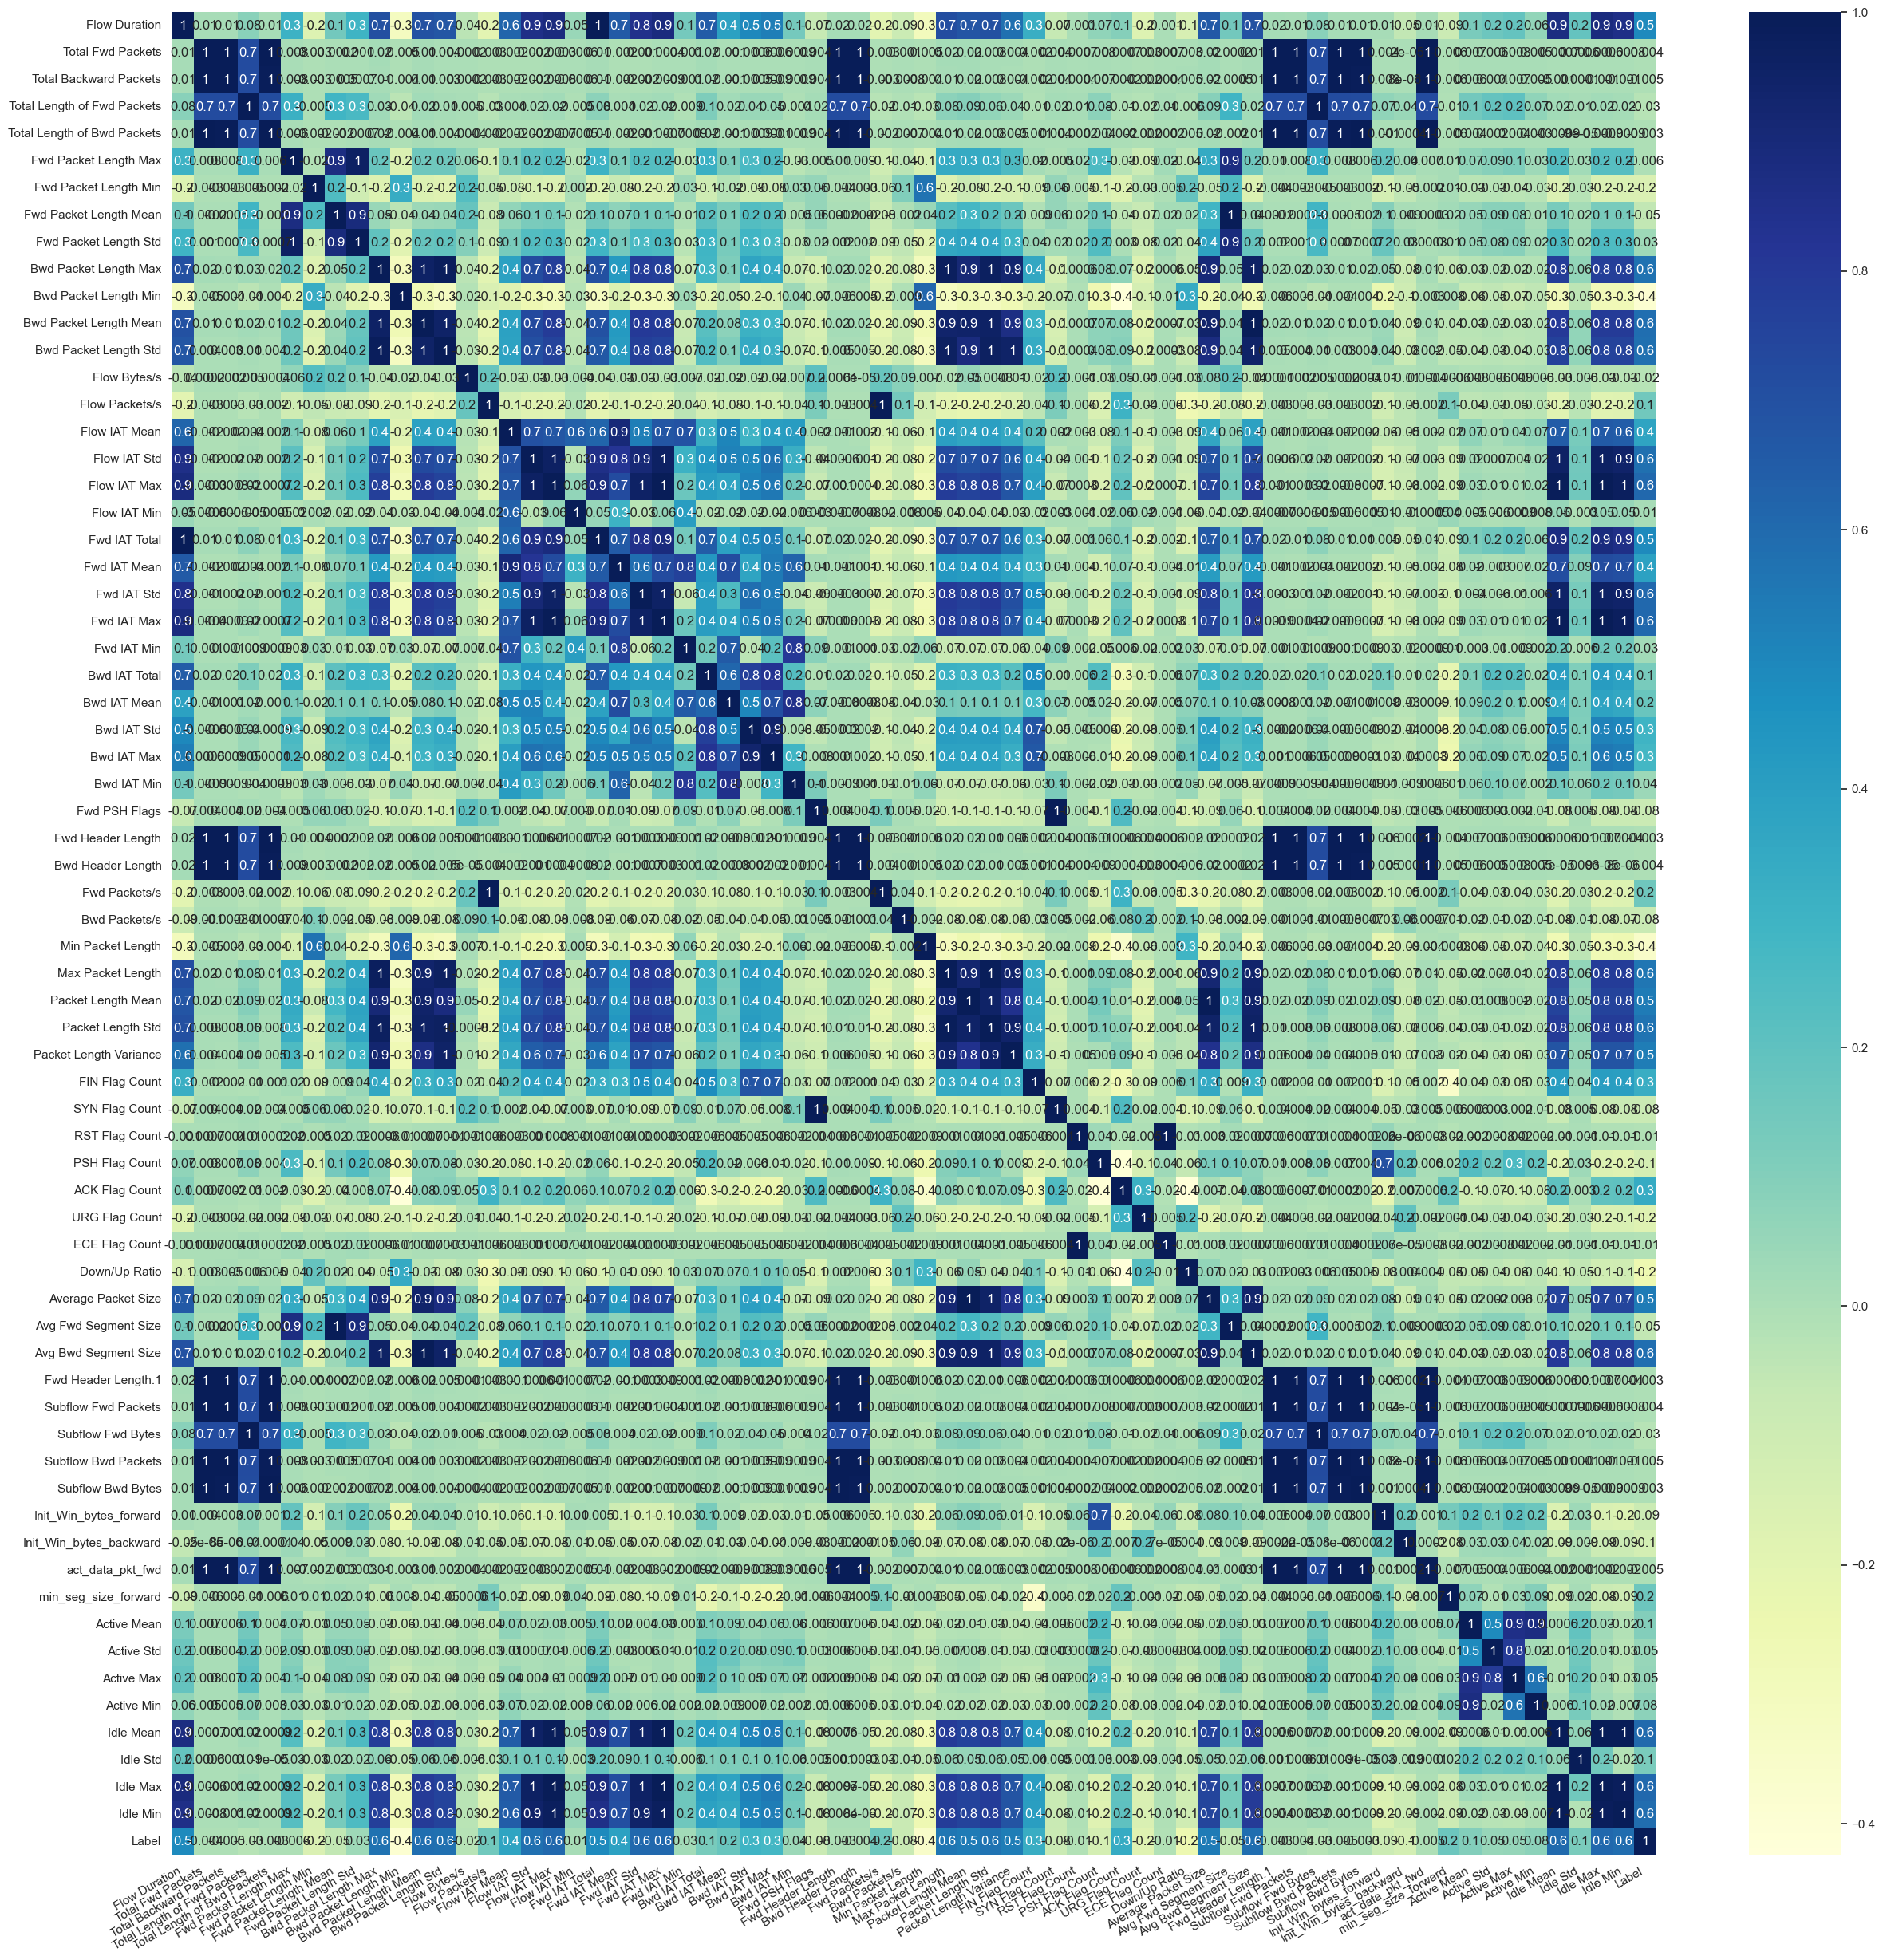

In [20]:
import seaborn as sns
corr_matrix = df_used.corr()
plt.rcParams['figure.figsize'] = (30, 30)
g = sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap="YlGnBu")
g.set_xticklabels(g.get_xticklabels(), verticalalignment='top', horizontalalignment='right', rotation=30);
plt.savefig('corr_heatmap_large.png', dpi=1000, bbox_inches='tight')

In [21]:
corr_matrix = df_used.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]
df_used = df_used.drop(columns=to_drop, errors='ignore')

In [22]:
df_used.shape

(692703, 47)

In [23]:
X = df_used.copy()
y = X.pop('Label')

In [24]:
selector = feature_selection.SelectKBest(
    similarity=stats.PearsonCorr(),
    k=20
)

for xi, yi, in stream.iter_pandas(X, y):
    selector = selector.learn_one(xi, yi)

print(selector.leaderboard)

Counter({'Flow IAT Max': 0.6087378686506607, 'Fwd IAT Std': 0.6057622094022368, 'Bwd Packet Length Mean': 0.583378431665522, 'Flow IAT Std': 0.5807103058491734, 'Bwd Packet Length Std': 0.5779396580148987, 'Bwd Packet Length Max': 0.5753911455303056, 'Packet Length Std': 0.5712700908054374, 'Max Packet Length': 0.556453429580207, 'Packet Length Mean': 0.5436470266052675, 'Packet Length Variance': 0.5375552483277918, 'Flow Duration': 0.48900007789951305, 'Fwd IAT Mean': 0.39256068411098705, 'Flow IAT Mean': 0.376238850432232, 'ACK Flag Count': 0.3380019847788653, 'FIN Flag Count': 0.3300567969464082, 'Bwd IAT Std': 0.29382348196365154, 'Bwd IAT Max': 0.28062000978958945, 'Bwd IAT Mean': 0.17298205491098861, 'min_seg_size_forward': 0.16434651237136505, 'Flow Packets/s': 0.14931708439582542, 'Bwd IAT Total': 0.13181959918525182, 'Idle Std': 0.12323062039300704, 'Active Mean': 0.10017171117977297, 'Active Min': 0.081383498671952, 'Active Max': 0.054593548947375274, 'Active Std': 0.05011697

In [25]:
selected_features = []
for x, y in selector.leaderboard.most_common(20):
    selected_features.append(x)
selected_features

['Flow IAT Max',
 'Fwd IAT Std',
 'Bwd Packet Length Mean',
 'Flow IAT Std',
 'Bwd Packet Length Std',
 'Bwd Packet Length Max',
 'Packet Length Std',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Variance',
 'Flow Duration',
 'Fwd IAT Mean',
 'Flow IAT Mean',
 'ACK Flag Count',
 'FIN Flag Count',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'min_seg_size_forward',
 'Flow Packets/s']

In [26]:
selected_features.append('Label')
selected_df = df_balanced[selected_features]
selected_df2 = df_unbalanced[selected_features]

### [NOT USED] PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

df1 = df_unbalanced
df1 = df1.drop(columns=['Label'], errors='ignore')
x = StandardScaler().fit_transform(df1)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)


plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
print("Explained Variance after PCA is ",sum(exp_var_pca[:30]))

In [ ]:
pca_indexes = pca.get_feature_names_out()
pca_df = pd.DataFrame(pca.components_,columns=df1.columns,index = pca_indexes)
pca_df.head()

In [ ]:
pca_df_abs = pca_df.abs()
pca_df_abs.head()

In [ ]:
selected_features = []
for row in pca_df_abs.index:
    val = max(pca_df_abs.loc[row])
    ind_val = pd.Series.idxmax(pca_df_abs.loc[row])
    print('{} is max element of row {} is : {}'.format(ind_val, row, val))
    selected_features.append(ind_val)
#selected_features

In [ ]:
s_features = np.array(selected_features[:30])
s_features = np.unique(s_features)
print(len(s_features))
s_features

In [ ]:

s_features = list(s_features)
print(len(s_features))
s_features.append('Label')
print(len(s_features))
selected_df = df_balanced[s_features]
selected_df2 = df_unbalanced[s_features]
selected_df.head()
#print(selected_df.shape)

### save dataframe with selected features

In [ ]:
selected_df.to_csv("selected_balanced.csv", index=False)
selected_df2.to_csv("selected_unbalanced.csv", index=False)

In [ ]:
selected_df = pd.read_csv("selected_balanced.csv", engine='python')
selected_df2 = pd.read_csv("selected_unbalanced.csv", engine='python')

In [27]:
df_used = selected_df2

In [28]:
c = list(df_used.columns)
c.remove('Label')
c

['Flow IAT Max',
 'Fwd IAT Std',
 'Bwd Packet Length Mean',
 'Flow IAT Std',
 'Bwd Packet Length Std',
 'Bwd Packet Length Max',
 'Packet Length Std',
 'Max Packet Length',
 'Packet Length Mean',
 'Packet Length Variance',
 'Flow Duration',
 'Fwd IAT Mean',
 'Flow IAT Mean',
 'ACK Flag Count',
 'FIN Flag Count',
 'Bwd IAT Std',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'min_seg_size_forward',
 'Flow Packets/s']

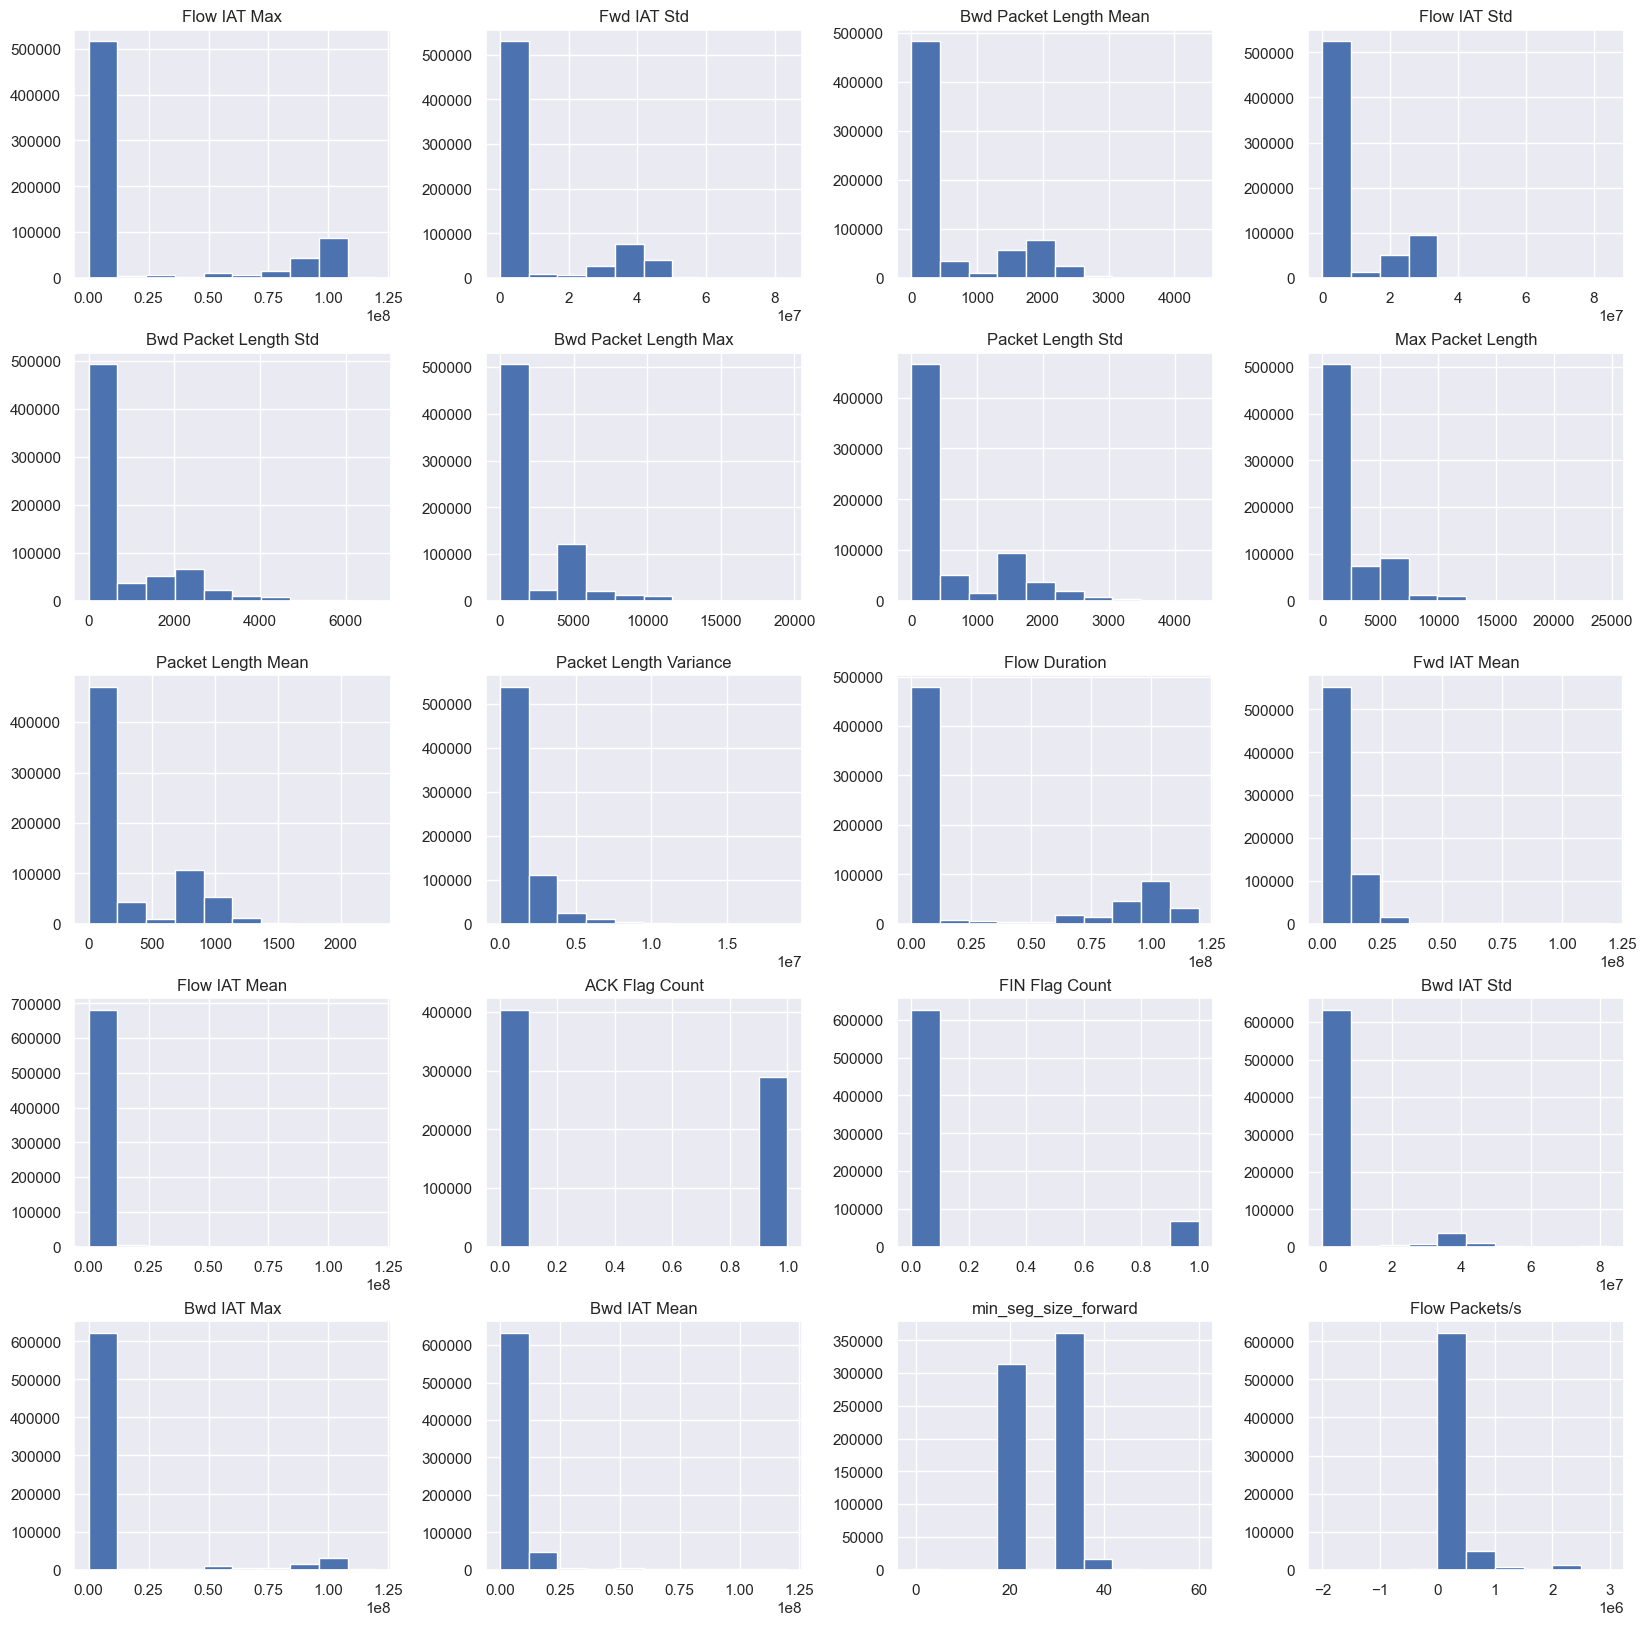

In [29]:
c = list(df_used.columns)
c.remove('Label')
df_used[c].hist(figsize=(20,20), bins=10);
plt.savefig('features_hist.png', dpi=300)

In [30]:
selected_df2.head()

,Flow IAT Max,Fwd IAT Std,Bwd Packet Length Mean,Flow IAT Std,Bwd Packet Length Std,Bwd Packet Length Max,Packet Length Std,Max Packet Length,Packet Length Mean,Packet Length Variance,...,Fwd IAT Mean,Flow IAT Mean,ACK Flag Count,FIN Flag Count,Bwd IAT Std,Bwd IAT Max,Bwd IAT Mean,min_seg_size_forward,Flow Packets/s,Label
0,38308.0,0.000000,6.000000,0.000000,0.000000,6,0.000000,6,6.000000,0.000000,...,0.000000,38308.000000,1,0,0.000000,0.0,0.000000,20,52.208416,0
1,73.0,38.942836,65.200000,25.510409,89.278777,163,56.529599,163,29.294118,3195.595588,...,47.900000,31.933333,0,0,101.736178,237.0,100.250000,32,33402.922760,0
2,810.0,298.746130,525.000000,204.960972,813.326503,1575,671.751541,1575,370.588235,451250.132400,...,121.666667,73.000000,0,0,345.535092,810.0,199.000000,32,14611.872150,0
3,13391.0,3322.417812,555.000000,2519.931377,977.480342,3069,704.654082,3069,337.066667,496537.374700,...,950.375000,543.071429,0,0,4176.449588,13961.0,1373.818182,32,1907.141918,0
4,794.0,313.850738,525.333333,207.000929,813.842901,1576,704.585067,1576,393.875000,496440.116700,...,136.500000,78.000000,0,0,333.240154,794.0,203.000000,32,13736.263740,0


In [31]:
from sklearn.preprocessing import LabelEncoder

df_used['Label'] = LabelEncoder().fit_transform(df_used['Label'])

C:\Users\ayoub\AppData\Local\Temp\ipykernel_16504\1800146582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_used['Label'] = LabelEncoder().fit_transform(df_used['Label'])


In [32]:
df_used['Label'].value_counts(normalize=True)

Label
0    0.635238
2    0.333582
1    0.014859
4    0.008367
3    0.007938
5    0.000016
Name: proportion, dtype: float64

## Part3

### use selected dataframe

In [33]:
X = df_used.copy()
y = X.pop('Label')

for xi, yi in stream.iter_pandas(X, y):
    print(xi, yi)
    break

{'Flow IAT Max': 38308.0, 'Fwd IAT Std': 0.0, 'Bwd Packet Length Mean': 6.0, 'Flow IAT Std': 0.0, 'Bwd Packet Length Std': 0.0, 'Bwd Packet Length Max': 6.0, 'Packet Length Std': 0.0, 'Max Packet Length': 6.0, 'Packet Length Mean': 6.0, 'Packet Length Variance': 0.0, 'Flow Duration': 38308.0, 'Fwd IAT Mean': 0.0, 'Flow IAT Mean': 38308.0, 'ACK Flag Count': 1.0, 'FIN Flag Count': 0.0, 'Bwd IAT Std': 0.0, 'Bwd IAT Max': 0.0, 'Bwd IAT Mean': 0.0, 'min_seg_size_forward': 20.0, 'Flow Packets/s': 52.208416} 0


In [ ]:
models_2 = [multiclass.OneVsOneClassifier(tree.SGTClassifier()), multiclass.OneVsRestClassifier(tree.SGTClassifier()), multiclass.OutputCodeClassifier(tree.SGTClassifier(), code_size=10)]
models = [tree.HoeffdingAdaptiveTreeClassifier(), forest.ARFClassifier(), forest.AMFClassifier(), multiclass.OneVsOneClassifier(linear_model.LogisticRegression()), multiclass.OneVsRestClassifier(linear_model.LogisticRegression()), multiclass.OutputCodeClassifier(linear_model.LogisticRegression(), code_size=10)]
for base_model2 in models_2:
    model2 = compose.Pipeline(preprocessing.StandardScaler(), base_model2)
    metric2 = metrics.ClassificationReport()

    for xi, yi in stream.iter_pandas(X, y):
        xi_scaled = xi#scaler.learn_one(xi).transform_one(xi)
        y_pred = model2.predict_one(xi_scaled)
        model2.learn_one(xi_scaled, yi)
        if y_pred is not None:
            metric2.update(yi, y_pred)
    print(base_model2)
    print(metric2)
    print("-"*30)

In [ ]:
dataset5 = stream.iter_pandas(X,y)

model5 = forest.ARFClassifier(n_models=10)
metric5 = metrics.F1()
evaluate.progressive_val_score(dataset5, model5, metric5)

## Imbalance

In [ ]:
dataset6 = stream.iter_pandas(X,y)
model6 = (
    preprocessing.StandardScaler() |
    forest.ARFClassifier()
)

metric6 = metrics.base.Metrics(metrics=(metrics.F1(),metrics.ROCAUC(),metrics.Precision(),metrics.Recall()))
evaluate.progressive_val_score(dataset6, model6, metric6)

In [ ]:
dataset6a = stream.iter_pandas(X,y)
model6a = (
    preprocessing.StandardScaler() |
    multiclass.OneVsRestClassifier(linear_model.LogisticRegression())
)

metric6a = metrics.base.Metrics(metrics=(metrics.F1(),metrics.ROCAUC(),metrics.Precision(),metrics.Recall()))
evaluate.progressive_val_score(dataset6a, model6a, metric6a)

In [ ]:
## Undersampling
dataset7 = stream.iter_pandas(X,y)
model7 = (
    preprocessing.StandardScaler() |
    imblearn.RandomUnderSampler(
        classifier=forest.ARFClassifier(),
        desired_dist={0: .198, 1: .198, 2: .198, 3: .198, 4: .198, 5: .01},
    )
)
metric7 = metrics.base.Metrics(metrics=(metrics.F1(),metrics.ROCAUC(),metrics.Precision(),metrics.Recall()))
evaluate.progressive_val_score(dataset7, model7, metric7)

In [ ]:
## Oversampling
dataset8 = stream.iter_pandas(X,y)
model8 = (
    preprocessing.StandardScaler() |
    imblearn.RandomOverSampler(
        classifier=forest.ARFClassifier(),
        desired_dist={0: .198, 1: .198, 2: .198, 3: .198, 4: .198, 5: .01},
    )
)

metric8 = metrics.base.Metrics(metrics=(metrics.F1(),metrics.ROCAUC(),metrics.Precision(),metrics.Recall()))
evaluate.progressive_val_score(dataset8, model8, metric8)

In [ ]:
## Under and Over Sampling
dataset9 = stream.iter_pandas(X,y)
model9 = (
    preprocessing.StandardScaler() |
    imblearn.RandomSampler(
        classifier=forest.ARFClassifier(),
        desired_dist={0: .198, 1: .198, 2: .198, 3: .198, 4: .198, 5: .01},
        sampling_rate=.1,
    )
)

metric9 = metrics.base.Metrics(metrics=(metrics.F1(),metrics.ROCAUC(),metrics.Precision(),metrics.Recall()))
evaluate.progressive_val_score(dataset9, model9, metric9)

In [ ]:
## Positive class weights 5x negative class
dataset10 = stream.iter_pandas(X,y)
model10 = (
    preprocessing.StandardScaler() |
    multiclass.OneVsRestClassifier(linear_model.LogisticRegression(loss=optim.losses.Log(weight_pos=5)))
)
metric10 = metrics.base.Metrics(metrics=(metrics.F1(),metrics.ROCAUC(),metrics.Precision(),metrics.Recall()))
evaluate.progressive_val_score(dataset10, model10, metric10)

In [ ]:
## possibile usare anche Focal loss
dataset11 = stream.iter_pandas(X,y)
model11 = (
    preprocessing.StandardScaler() |
    multiclass.OneVsRestClassifier(linear_model.LogisticRegression(
        loss=optim.losses.BinaryFocalLoss(2,1)
    ))
)
metric11 = metrics.base.Metrics(metrics=(metrics.F1(),metrics.ROCAUC(),metrics.Precision(),metrics.Recall()))
evaluate.progressive_val_score(dataset11, model11, metric11)

In [ ]:
dataset12 = stream.iter_pandas(X,y)
model12 = (
    preprocessing.StandardScaler() |
    imblearn.RandomOverSampler(
        classifier=multiclass.OneVsRestClassifier(linear_model.LogisticRegression(loss=optim.losses.BinaryFocalLoss(2, 1))),
        desired_dist={0: .198, 1: .198, 2: .198, 3: .198, 4: .198, 5: .01},
))
metric12 = metrics.base.Metrics(metrics=(metrics.F1(),metrics.ROCAUC(),metrics.Precision(),metrics.Recall()))
evaluate.progressive_val_score(dataset12, model12, metric12)

## Hyperparameter selection

In [37]:
from river import model_selection
from sklearn.preprocessing import LabelEncoder
from river import utils

df_used = pd.read_csv("selected_unbalanced.csv", engine='python')
df_used['Label'] = LabelEncoder().fit_transform(df_used['Label'])
X = df_used.copy()
y = X.pop('Label')
print(X.shape, y.shape)
dataset_used = stream.iter_pandas(X,y)

(692703, 20) (692703,)


In [ ]:
model_used = forest.ARFClassifier(metric=metrics.F1(), max_depth=None)
parameters = {
    'n_models': [5, 10, 15],
    'max_features': ['sqrt', 'log2', None],
    'split_criterion': ['gini', 'info_gain', 'hellinger'],
    'leaf_prediction': ['mc', 'nb', 'nba']
}

model_to_use = utils.expand_param_grid(model_used, parameters)
len(model_to_use)

In [ ]:

sh = model_selection.SuccessiveHalvingClassifier(
    model_to_use,
    metric=metrics.F1(),
    budget=56108943,
    eta=2
)

evaluate.progressive_val_score(
    dataset=dataset_used,
    model=sh,
    metric=metrics.F1()
)

sh.best_model

In [13]:
sh.best_model

ARFClassifier([ForestMemberClassifier (
                 index_original=0
                 model=BaseTreeClassifier (
                   max_features=4
                   grace_period=50
                   max_depth=inf
                   split_criterion="gini"
                   delta=0.01
                   tau=0.05
                   leaf_prediction="nba"
                   nb_threshold=0
                   nominal_attributes=None
                   splitter=GaussianSplitter (
                     n_splits=10
                   )
                   binary_split=False
                   max_size=100.
                   memory_estimate_period=2000000
                   stop_mem_management=False
                   remove_poor_attrs=False
                   merit_preprune=True
                   rng=<random.Random object at 0x000002224C4CC680>
                 )
                 created_on=617197
                 drift_detector=ADWIN (
                   delta=0.001
                   clock=32
                   max_buckets=5
                   min_window_length=5
                   grace_period=10
                 )
                 warning_detector=ADWIN (
                   delta=0.01
                   clock=32
                   max_buckets=5
                   min_window_length=5
                   grace_period=10
                 )
                 is_background_learner=False
                 metric=F1 (
                   cm=ConfusionMatrix (
                     classes=[False, True]
                   )
                   pos_val=True
                 )
               ),
               ForestMemberClassifier (
                 index_original=1
                 model=BaseTreeClassifier (
                   max_features=4
                   grace_period=50
                   max_depth=inf
                   split_criterion="gini"
                   delta=0.01
                   tau=0.05
                   leaf_prediction="nba"
                   nb_threshold=0
                   nominal_attributes=None
                   splitter=GaussianSplitter (
                     n_splits=10
                   )
                   binary_split=False
                   max_size=100.
                   memory_estimate_period=2000000
                   stop_mem_management=False
                   remove_poor_attrs=False
                   merit_preprune=True
                   rng=<random.Random object at 0x000002224C4CC680>
                 )
                 created_on=589196
                 drift_detector=ADWIN (
                   delta=0.001
                   clock=32
                   max_buckets=5
                   min_window_length=5
                   grace_period=10
                 )
                 warning_detector=ADWIN (
                   delta=0.01
                   clock=32
                   max_buckets=5
                   min_window_length=5
                   grace_period=10
                 )
                 is_background_learner=False
                 metric=F1 (
                   cm=ConfusionMatrix (
                     classes=[False, True]
                   )
                   pos_val=True
                 )
               ),
               ForestMemberClassifier (
                 index_original=2
                 model=BaseTreeClassifier (
                   max_features=4
                   grace_period=50
                   max_depth=inf
                   split_criterion="gini"
                   delta=0.01
                   tau=0.05
                   leaf_prediction="nba"
                   nb_threshold=0
                   nominal_attributes=None
                   splitter=GaussianSplitter (
                     n_splits=10
                   )
                   binary_split=False
                   max_size=100.
                   memory_estimate_period=2000000
                   stop_mem_management=False
                   remove_poor_attrs=False
                   merit_preprune=True

## Final Model

In [15]:
final_model = forest.ARFClassifier(
    n_models=5,
    max_features='sqrt',
    metric=metrics.F1(),
    split_criterion='gini',
    leaf_prediction='nba',
    max_depth=None)
final_df = pd.read_csv("selected_unbalanced.csv", engine='python')
final_df['Label'] = LabelEncoder().fit_transform(final_df['Label'])
X = final_df.copy()
y = X.pop('Label')
print(X.shape, y.shape)
final_dataset = stream.iter_pandas(X,y)
evaluate.progressive_val_score(dataset=final_dataset, model=final_model, metric=metrics.ClassificationReport())

(692703, 20) (692703,)


           Precision   Recall   F1       Support  
                                                  
       0      99.88%   99.68%   99.78%    440030  
       1      99.42%   98.87%   99.15%     10293  
       2      99.45%   99.87%   99.66%    231073  
       3      99.58%   99.75%   99.66%      5499  
       4      99.06%   98.12%   98.59%      5796  
       5      90.00%   81.82%   85.71%        11  
                                                  
   Macro      97.90%   96.35%   97.09%            
   Micro      99.72%   99.72%   99.72%            
Weighted      99.72%   99.72%   99.72%            

                 99.72% accuracy                  